In [1]:
from fastai.vision.all import *

In [2]:
Path.BASE_PATH = path = Path('../')/'paddy'
trn_path = path/'train_images'

In [3]:
path.ls()

(#5) [Path('sample_submission.csv'),Path('test_images'),Path('train_images'),Path('train.csv'),Path('paddy-disease-classification.zip')]

In [4]:
trn_path.ls()

(#10) [Path('train_images/bacterial_panicle_blight'),Path('train_images/dead_heart'),Path('train_images/tungro'),Path('train_images/hispa'),Path('train_images/normal'),Path('train_images/bacterial_leaf_streak'),Path('train_images/brown_spot'),Path('train_images/bacterial_leaf_blight'),Path('train_images/downy_mildew'),Path('train_images/blast')]

In [5]:
blb = trn_path/'bacterial_leaf_blight'
blb.ls()

(#479) [Path('train_images/bacterial_leaf_blight/110320.jpg'),Path('train_images/bacterial_leaf_blight/102935.jpg'),Path('train_images/bacterial_leaf_blight/107251.jpg'),Path('train_images/bacterial_leaf_blight/101973.jpg'),Path('train_images/bacterial_leaf_blight/100956.jpg'),Path('train_images/bacterial_leaf_blight/104018.jpg'),Path('train_images/bacterial_leaf_blight/109324.jpg'),Path('train_images/bacterial_leaf_blight/107592.jpg'),Path('train_images/bacterial_leaf_blight/106539.jpg'),Path('train_images/bacterial_leaf_blight/101593.jpg')...]

In [6]:
df = pd.read_csv(path/'train.csv')
df

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45
...,...,...,...,...
10402,107607.jpg,tungro,Zonal,55
10403,107811.jpg,tungro,Zonal,55
10404,108547.jpg,tungro,Zonal,55
10405,110245.jpg,tungro,Zonal,55


In [7]:
files = get_image_files(trn_path)
files

(#10407) [Path('train_images/bacterial_panicle_blight/109162.jpg'),Path('train_images/bacterial_panicle_blight/109183.jpg'),Path('train_images/bacterial_panicle_blight/101765.jpg'),Path('train_images/bacterial_panicle_blight/101592.jpg'),Path('train_images/bacterial_panicle_blight/104770.jpg'),Path('train_images/bacterial_panicle_blight/110190.jpg'),Path('train_images/bacterial_panicle_blight/106643.jpg'),Path('train_images/bacterial_panicle_blight/104269.jpg'),Path('train_images/bacterial_panicle_blight/108023.jpg'),Path('train_images/bacterial_panicle_blight/107676.jpg')...]

In [8]:
# img = PILImage.create(blb/'100330.jpg')
img = PILImage.create(files[0])

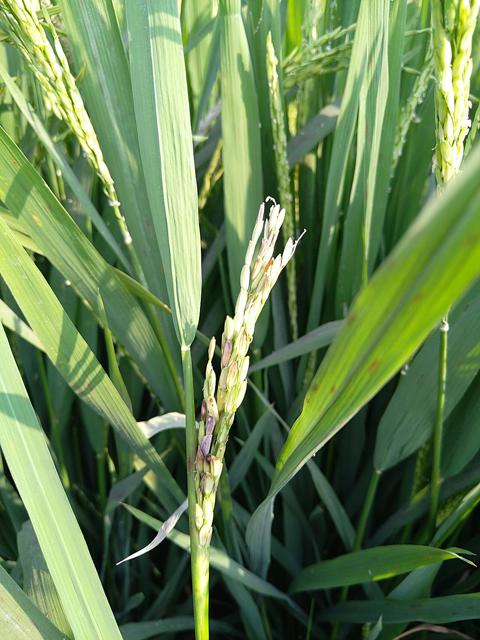

In [9]:
img

In [10]:
[PILImage.create(o).size for o in files[:10] ]

[(480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640)]

In [11]:
df.variety.value_counts()

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64

In [12]:
def is_cat(x): return x[0].isupper()

In [13]:
dls = ImageDataLoaders.from_folder(trn_path,valid_pct=0.2,seed=42,item_tfms=Resize(224))

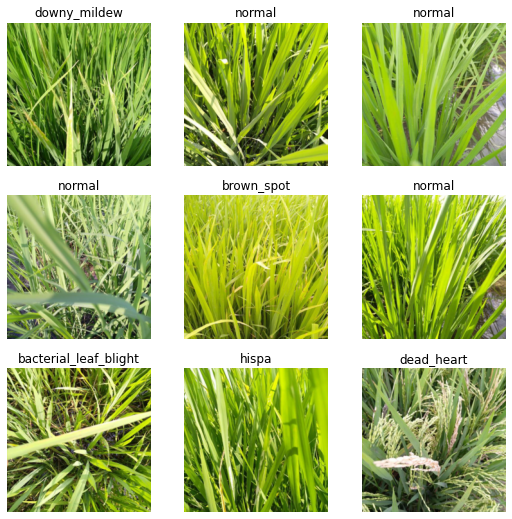

In [14]:
dls.show_batch()

In [15]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [16]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.950482,1.028739,0.328688,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.749803,0.450342,0.139837,00:38


In [17]:
%time sizes = [PILImage.create(o).size for o in files]

CPU times: user 26 s, sys: 603 ms, total: 26.6 s
Wall time: 26.6 s


In [18]:
from fastcore.parallel import *

In [19]:
doc(parallel)

parallel(f, items, *args, n_workers=8, total=None, progress=None, pause=0, method=None, threadpool=False, timeout=None, chunksize=1, **kwargs)
Applies `func` in parallel to `items`, using `n_workers`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [20]:
def f(o): return PILImage.create(o).size

In [21]:
%time sizes = parallel(f, files, n_workers=4)

CPU times: user 3.89 s, sys: 974 ms, total: 4.86 s
Wall time: 27.9 s


In [22]:
%time sizes = parallel(f, files, n_workers=8)

CPU times: user 3.82 s, sys: 1.32 s, total: 5.13 s
Wall time: 36 s
